### import statements

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [95]:
#PCA
from sklearn.decomposition import PCA
#LDA
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#model evaluation (first used in LDA)
from sklearn.metrics import confusion_matrix, classification_report
#used in linear regression
from sklearn.linear_model import LinearRegression
#used in Logistic regression sectionss
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#used in SVM
from sklearn.datasets import load_digits
from sklearn.svm import SVC #"Support vector classifier"
#decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#K-means 
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
#Hierarchical Clustering
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
#Perceptron Model
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
#MLP_classification
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Principle Component Analysis

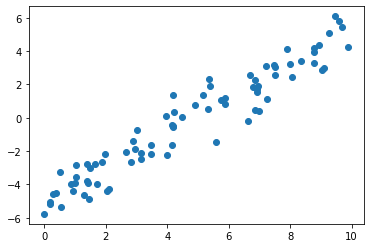

In [4]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(80) 
y = x - 5 + rng.randn(80) 

In [5]:
pca_df = pd.DataFrame({'x':x, 'y':y})
pca_df.head(2)

,x,y
0,4.170220,-0.544193
1,7.203245,3.088386


Create a PCA instance/model using sklearn package to project the data on a 1-D space. Show a plot of the data points after projection.

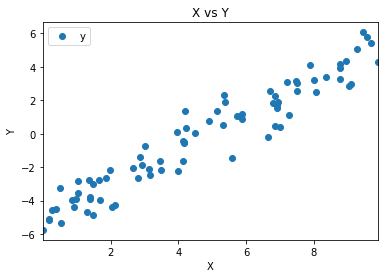

In [6]:
#Plotting the data w more information
pca_df.plot(x='x', y='y', style='o')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
#preparing the data
X = pca_df.iloc[:, :-1].values
y = pca_df.iloc[:, 1].values

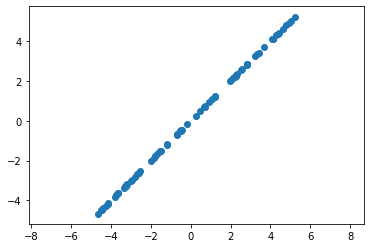

In [12]:
#Applying PCA to project the data on a 1-D space. :
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
plt.axis('equal')
plt.scatter(X_pca[:,0],X_pca[:,0])

# Linear Disscriminant Analysis (LDA)

In [15]:
#create dataset
X, y = make_blobs(n_samples=300, centers=3, random_state=1, cluster_std=1.0)

Show the scatter plot of the dataset (each class patterns from a different color. Apply LDA for projecting the data on a 1-D space. Split the dataset into 75% training and 25% testing patterns. Apply LDA to classify the data into respective classes. Show the classification report and Confusion matrix

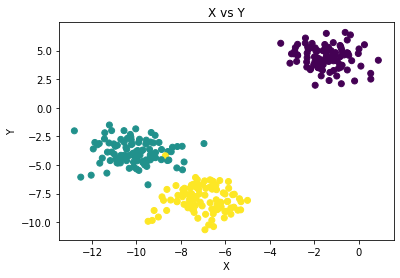

In [16]:
#Plotting the data
plt.scatter(X[:,0],X[:,1], c=y)
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

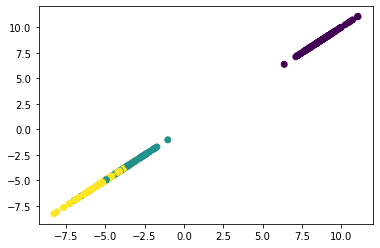

In [17]:
#Applying LDA
lda =LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:,0],X_lda[:,0], c=y)

In [94]:
# Train test split
xtrain, xtest, ytrain, ytest=train_test_split(X,y,test_size=0.25, random_state=0)

In [19]:
#Classification by LDA
lda.fit(xtrain,ytrain)
yn=lda.predict(xtest)

In [22]:
#all print statements shorted to make notebook cleaner, take out [:5] to be full output
print(ytest[:5])
print(yn[:5])
difference_array = ytest-yn
print(difference_array[:5])

[2 1 1 2 0]
[2 1 1 2 0]
[0 0 0 0 0]


In [28]:
print(classification_report(ytest,yn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.96      0.98        24
           2       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [29]:
print(confusion_matrix(ytest,yn))

[[26  0  0]
 [ 0 23  1]
 [ 0  0 25]]


# Linear Regression

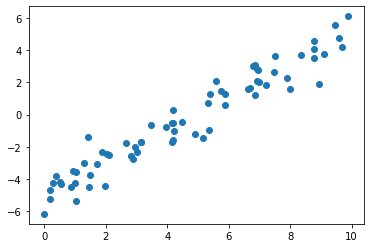

In [30]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(70) 
y = x - 5 + rng.randn(70) 
plt.scatter(x, y); 
plt.show()

In [31]:
df_linear_regression = pd.DataFrame({'x':x, 'y':y})
df_linear_regression.head()

,x,y
0,4.170220,-0.529610
1,7.203245,1.850995
2,0.001144,-6.141374
3,3.023326,-2.326017
4,1.467559,-3.741335


Fit a linear regression model to the above generated 2-D data and plot the regression line. Also calculate MSE and R2 score of the fitting.

In [32]:
#preparing the data
X = df_linear_regression.iloc[:, :-1].values
y = df_linear_regression.iloc[:, 1].values

In [33]:
#applying linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#printing parameters:
print(reg.intercept_)
print(reg.coef_)

-4.953855818106467
[1.00734041]


In [35]:
#making predictions:
y_pred = reg.predict(X)

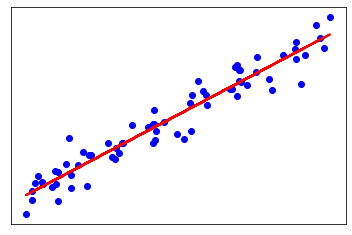

In [36]:
# Plot outputs
plt.scatter(X, y,  color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [37]:
# calculating MSE and R2 score of the fitting
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y, y_pred))

Mean squared error: 0.65
R^2 Score: 0.93


# Logistic Regression

In [40]:
#converting the built-in data set to a Pandas dataframe.
cancer = load_breast_cancer()#as_frame = True)
X= cancer.data
y = cancer.target
X.shape

(569, 30)

In [43]:
# Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [45]:
#Building logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\AnnaA\Program_Unpacking\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Classifying test data
y_pred = model.predict(X_test)

In [48]:
#model evaluation
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[52  1]
 [ 5 85]]


# Support Vector Machine (SVM)

In [50]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [51]:
X=digits.data
y=digits.target
print(y)

[0 1 2 ... 8 9 8]


In [52]:
# Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [54]:
#building linear SVM to classify the data
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
# Classifying test data using SVM
y_pred = model.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



# Decision Tree

In [59]:
#building decision tree model to classify the data
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
# Classifying test data using Decision tree
y_p = dtc.predict(X_test)

In [61]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.88      0.84      0.86        43
           2       0.78      0.86      0.82        44
           3       0.69      0.78      0.73        45
           4       0.89      0.87      0.88        38
           5       0.91      0.88      0.89        48
           6       0.96      0.94      0.95        52
           7       0.97      0.79      0.87        48
           8       0.84      0.77      0.80        48
           9       0.70      0.83      0.76        47

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.85       450
weighted avg       0.85      0.84      0.85       450



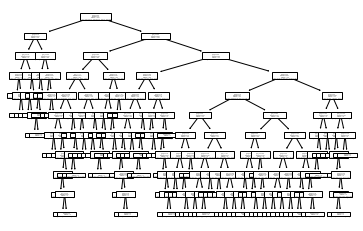

In [63]:
#plotting tree
tree.plot_tree(dtc)
plt.show()

# K-Means Clustering

In [64]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [67]:
X=digits.data
y=digits.target
#Applying K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)
#Silhouette score
score = silhouette_score(X, labels, metric = 'euclidean')
score

0.18237583416208777

In [69]:
#Homogeneity score
h_score = homogeneity_score(y, labels)
h_score

0.7356680159969915

# Gaussian Mixture Model

# Hierarchical Clustering

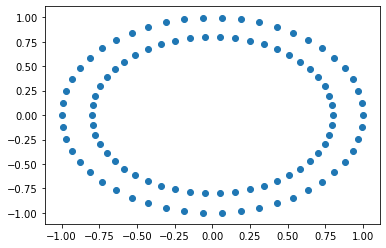

In [72]:
#import data
X, y_true=make_circles(n_samples=100)
plt.scatter(X[:,0],X[:,1])

In [74]:
cluster = AgglomerativeClustering (n_clusters=2, linkage='single')
labels = cluster.fit_predict(X)

In [75]:
#Silhouette score
score = silhouette_score(X, labels, metric = 'euclidean')
print ("Silhouette score : %.3f" %(score))

Silhouette score : 0.005


In [76]:
#Homogeneity score
h_score = homogeneity_score(y_true, labels)
print ("Homogeneity score: %.3f" %(h_score))

Homogeneity score: 1.000


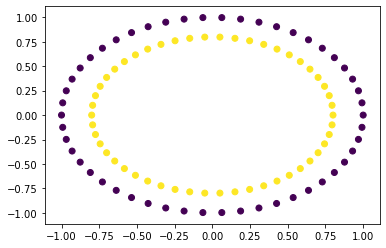

In [77]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_)

# Artificial Neural Networks

### Perceptron

In [79]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int32)
X.shape

(150, 2)

In [81]:
df_perceptron = pd.DataFrame(X, columns=['petal length', 'petal width'])
df_perceptron.head(2)

,petal length,petal width
0,1.4,0.2
1,1.4,0.2


In [82]:
df_perceptron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
petal length    150 non-null float64
petal width     150 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB


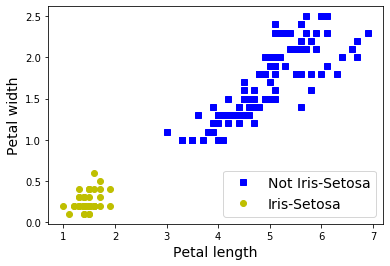

In [83]:
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.legend(loc="lower right", fontsize=14)

plt.show()

In [85]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
y_pred = per_clf.predict([[2, 0.5]])

In [89]:
y_pred

array([1])

### MLP Classification

In [90]:
train_data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/test.csv')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
train_data.head()

In [ ]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
train_data.info()

In [ ]:
train_data['Survived'].value_counts()

In [ ]:
train_data['Pclass'].value_counts()

In [ ]:
train_data['Sex'].value_counts()

In [ ]:
train_data['Embarked'].value_counts()

In [ ]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())
])

In [ ]:
cat_pipeline = Pipeline([
                         ('ordinal_encoder', OrdinalEncoder()),
                         ('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_encoder', OneHotEncoder(sparse=False))
])

In [ ]:
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked']

preprocess_pipeline = ColumnTransformer([
                                         ('num', num_pipeline, num_features),
                                         ('cat', cat_pipeline, cat_features)
])

In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data)
y_train = train_data['Survived']
mlp_clf = MLPClassifier(hidden_layer_sizes=(30), activation='relu',
                        solver='sgd', learning_rate='constant',
                        max_iter=500, random_state=42)

In [ ]:
mlp_clf.fit(X_train, y_train)

In [ ]:
mlp_clf_scores = cross_val_score(mlp_clf, X_train, y_train, cv=10)
mlp_clf_scores.mean()

In [ ]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = mlp_clf.predict(X_test)
y_pred